In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
def set_plt_size(*size):
    plt.rcParams['figure.figsize'] = size

In [3]:
data = np.load('base.npz')
coords = data['coords']

In [4]:
markers = utils.prepare(data['markers'])

In [5]:
def plot_markers(markers):
    cols = len(markers)
    rows = cols // 10 + 1
    if cols % 10 == 0:
        rows -= 1
    cols = min(10, cols)
    set_plt_size(4 * cols, 4 * rows)
    fix, axs = plt.subplots(rows, cols)
    for i, marker in enumerate(markers):
        if rows > 1:
            axs[i // 10, i % 10].imshow(marker)
            axs[i // 10, i % 10].axis('off')
        else:
            axs[i].imshow(marker)
            axs[i].axis('off')

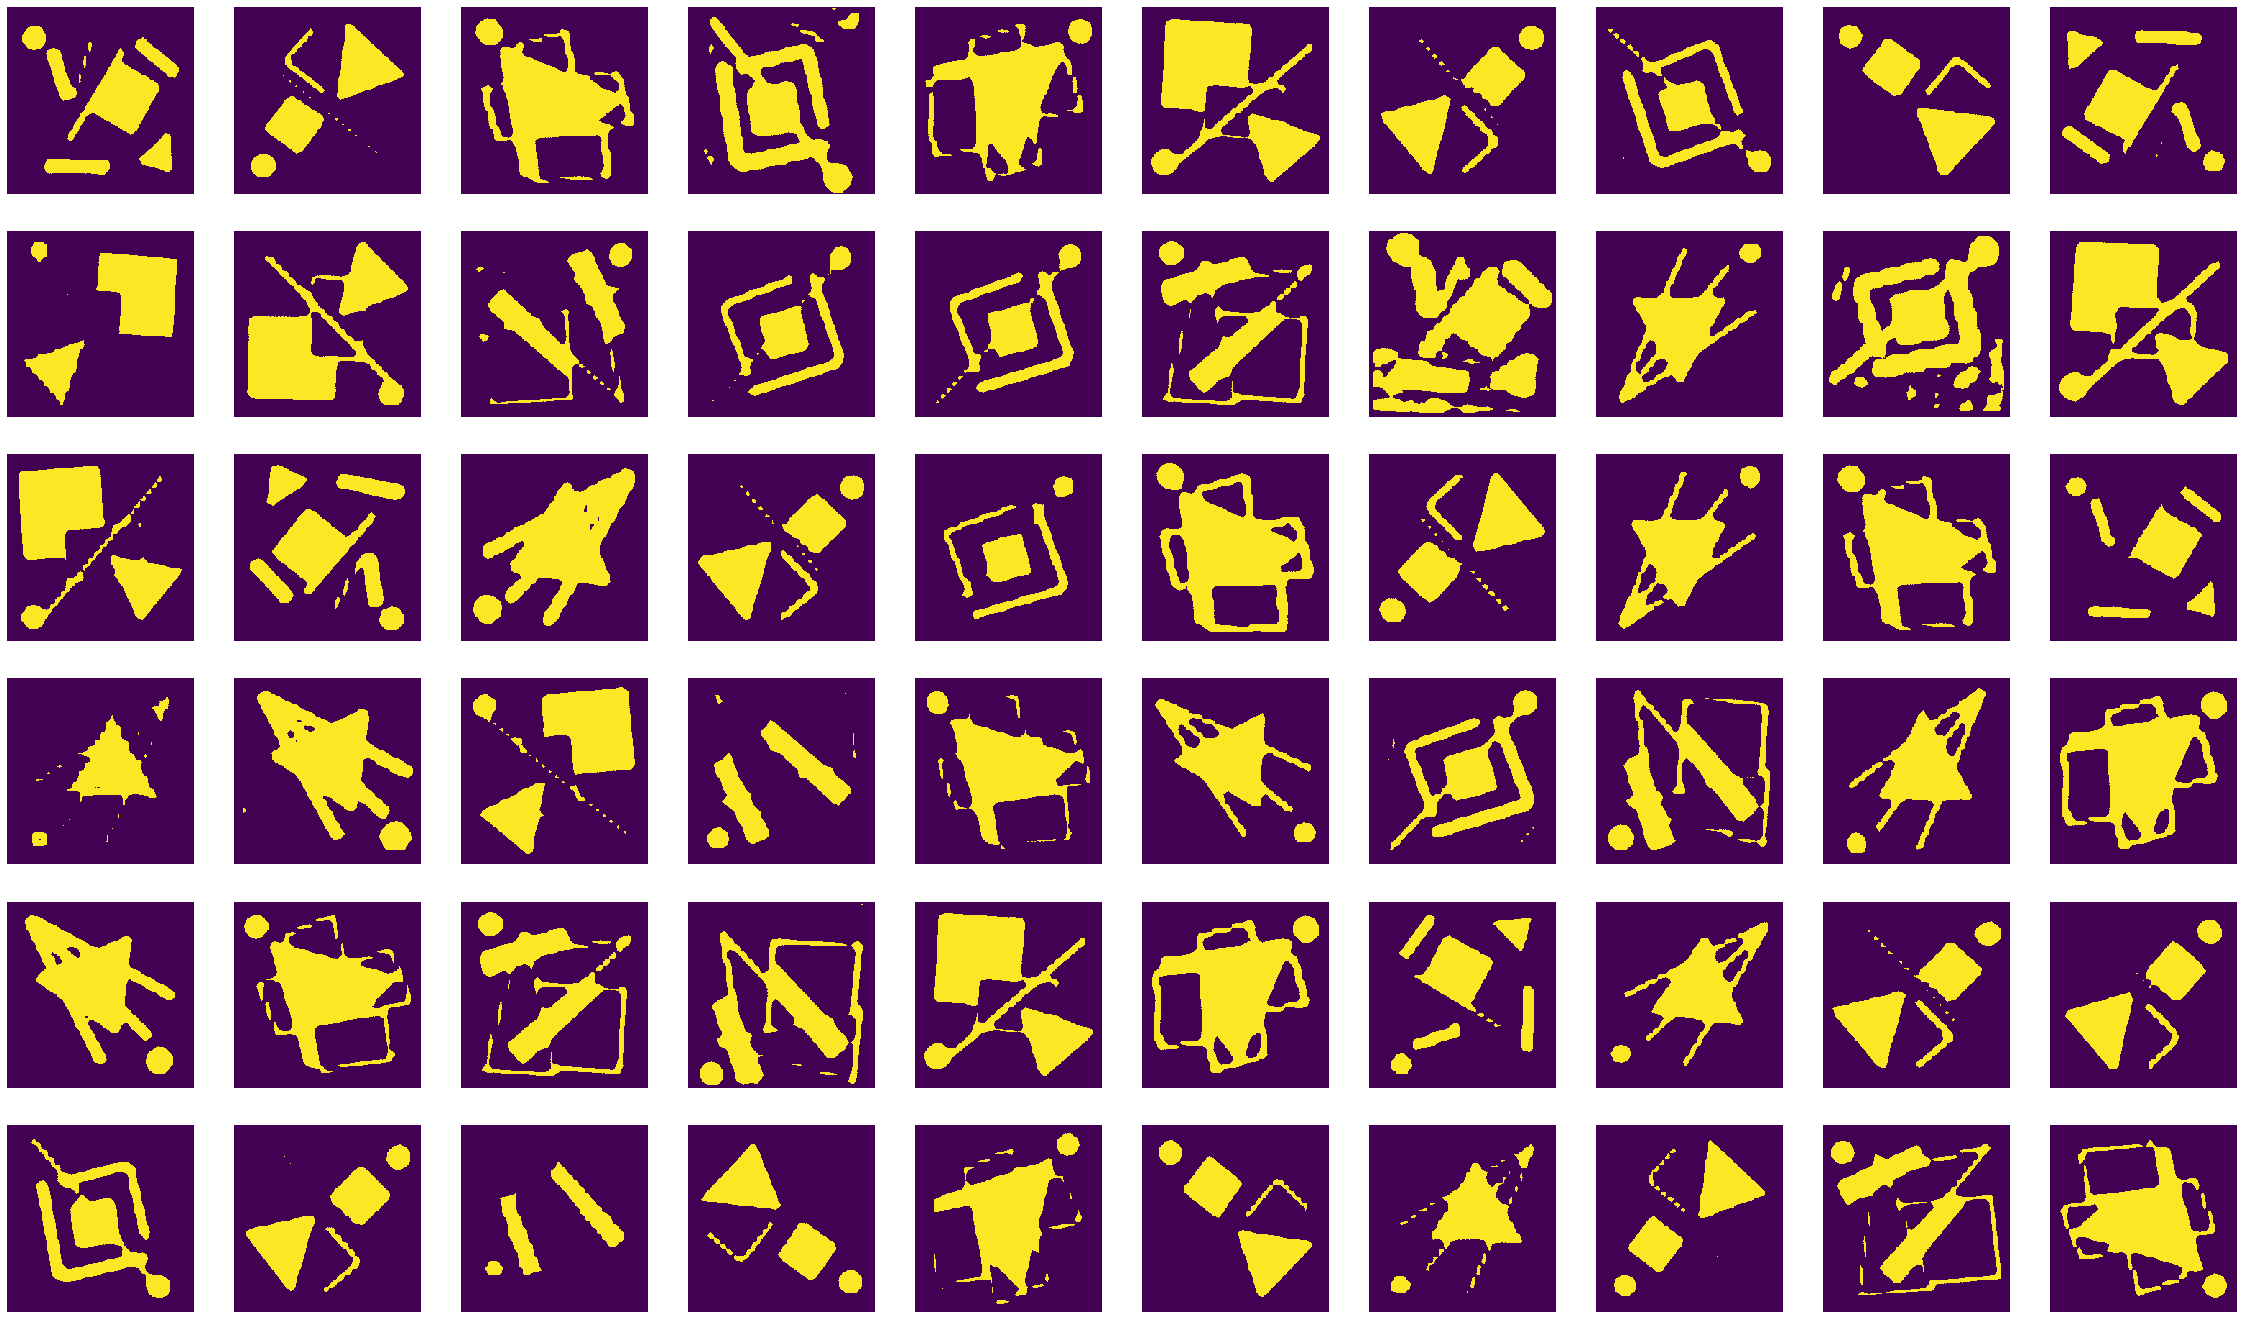

In [6]:
plot_markers(markers)

In [7]:
markers = list(markers)
for i, marker in enumerate(markers):
    markers[i] = [utils.rotate(marker)[0]]
markers = np.concatenate(markers, axis=0)

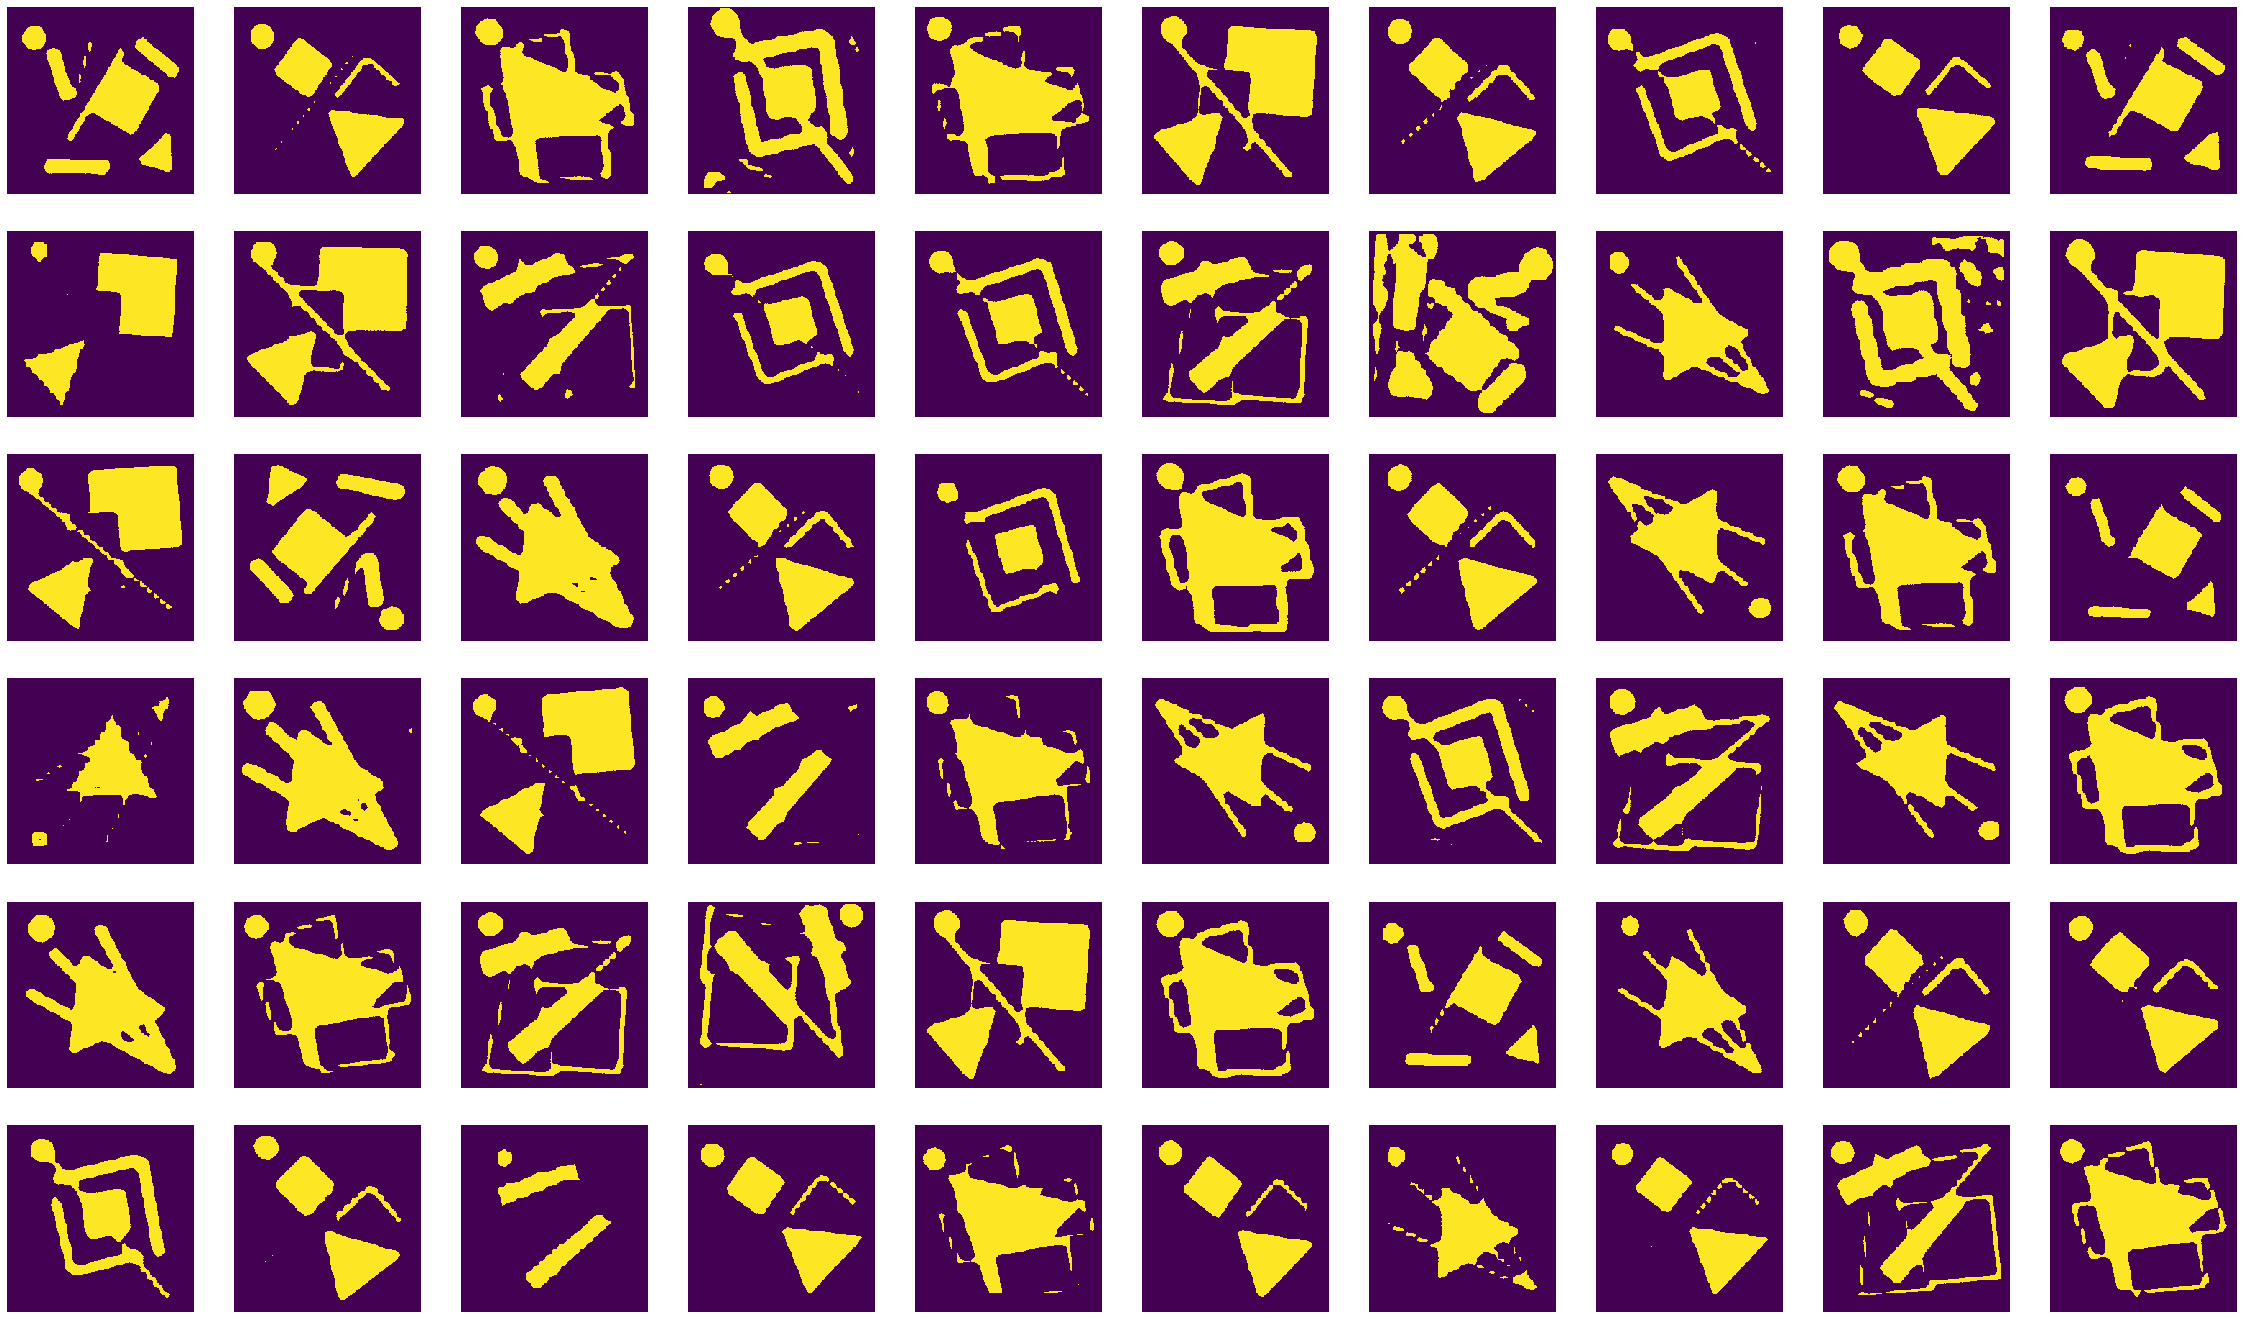

In [8]:
plot_markers(markers)

In [9]:
templates = {
    1: markers[40],
    2: markers[59],
    3: markers[37],
    4: markers[14],
    5: markers[29],
    6: markers[19],
    7: markers[49]
}

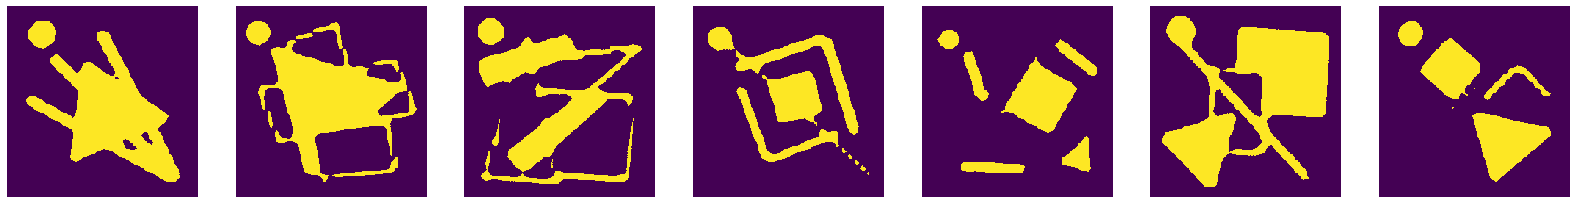

In [10]:
plot_markers(list(templates.values()))

In [11]:
for key, image in templates.items():
    image = image.copy()
    for angle in 270, 180, 90, 0:
        image = np.rot90(image)
        cv2.imwrite(f'./rotated_templates/{key}_{angle}.jpg', image)

In [12]:
for key, img in templates.items():
    cv2.imwrite(f'templates/{key}.jpg', img)